In [77]:
import numpy as np
import matplotlib.pyplot as plt

#My plot style to standardize my plot esthetics
def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    #plt.rcParams['pcolor.shading'] = 'nearest'
pi = np.pi; h = 6.626e-34; c = 3.0e+8; k = 1.38e-23
wav = np.linspace(100e-10, 20000e-10)
T = 4000

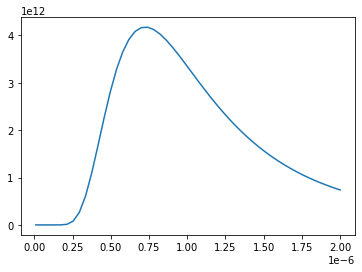

In [9]:
def temp(wav,T, N):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    return N* a/ ( (wav**5)*(np.exp(b) - 1.0) )

plt.plot(wav, temp(wav,T,1))

3.246589098007664

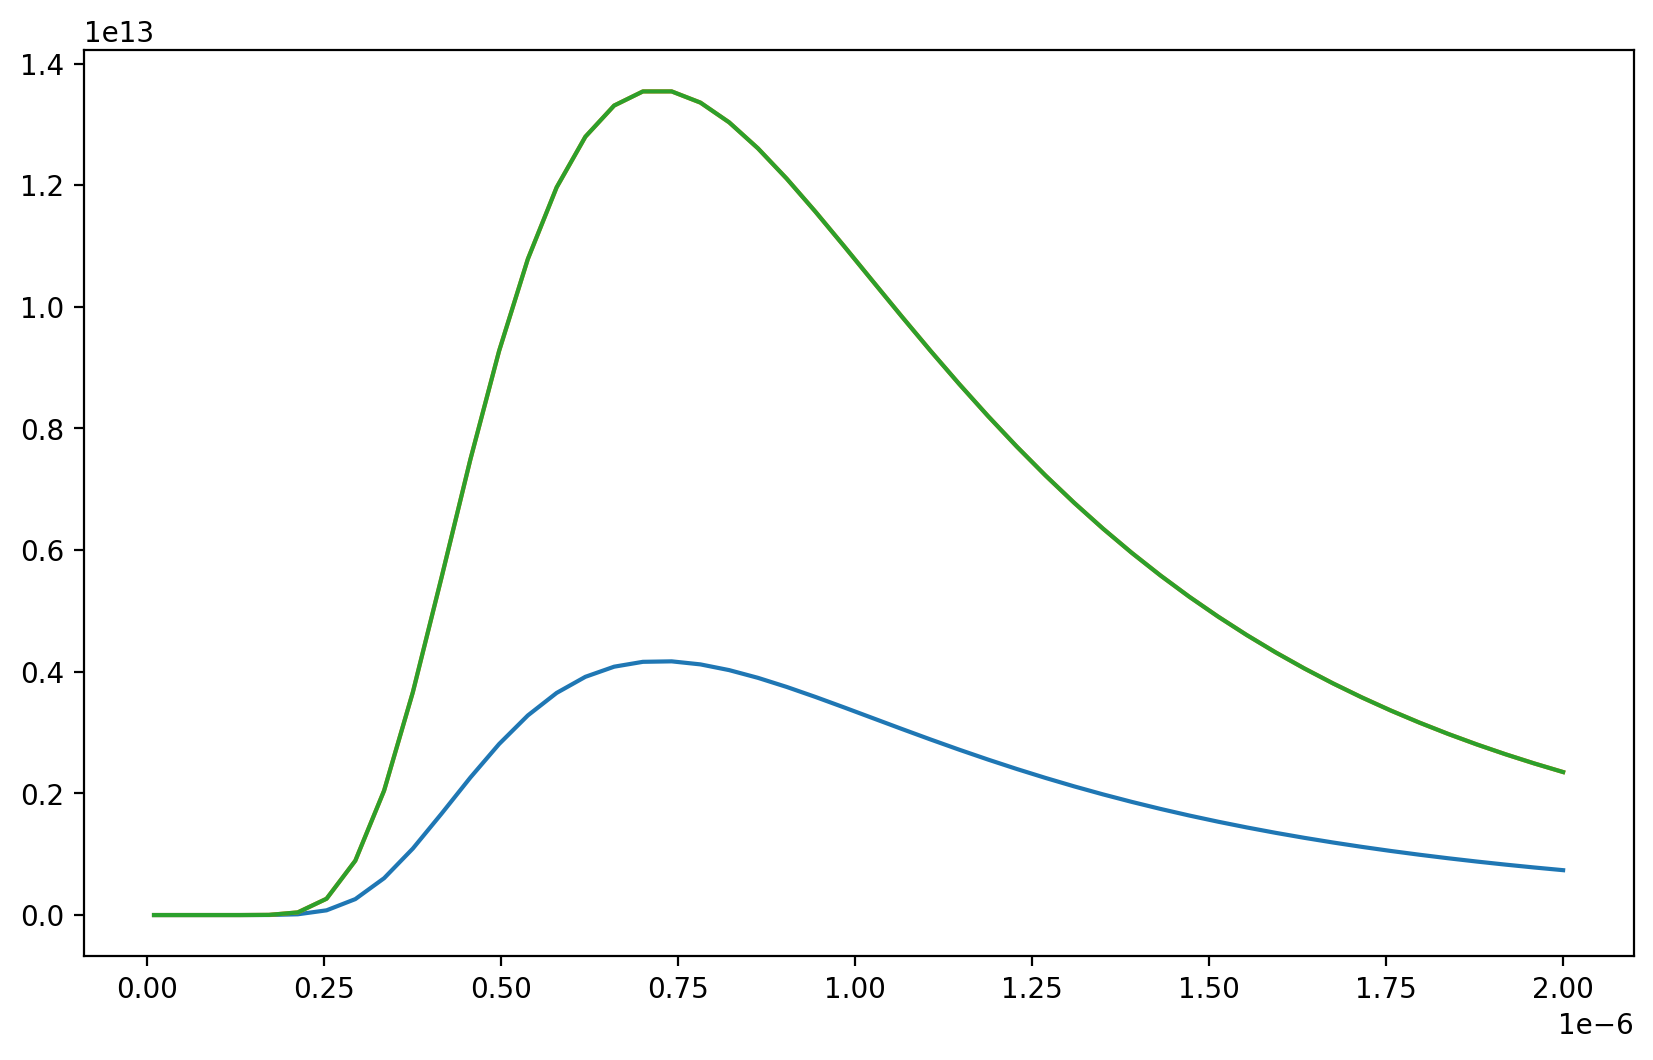

In [10]:
beta = 0.01
x = np.linspace(beta, 1)

plt.figure(figsize=(10,6), dpi=200)
bb = temp(wav,T,1)
plt.plot(wav, bb)

bb_fold = [np.trapz( 2*np.pi* 2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*(1/np.sqrt(1-beta**2)/(1-beta*x))))-1)*
           x, #*(1/np.sqrt(1-beta**2)/(1-beta*x))**(-2), 
                    x=x ) for i in wav]

plt.plot( wav, bb_fold )
from scipy.optimize import curve_fit
p, cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
plt.plot( wav, temp(wav,p[0],p[1]) )


max(bb_fold)/max(bb)

In [7]:
p[1]

3.1410739327154196

0.9332544185567895

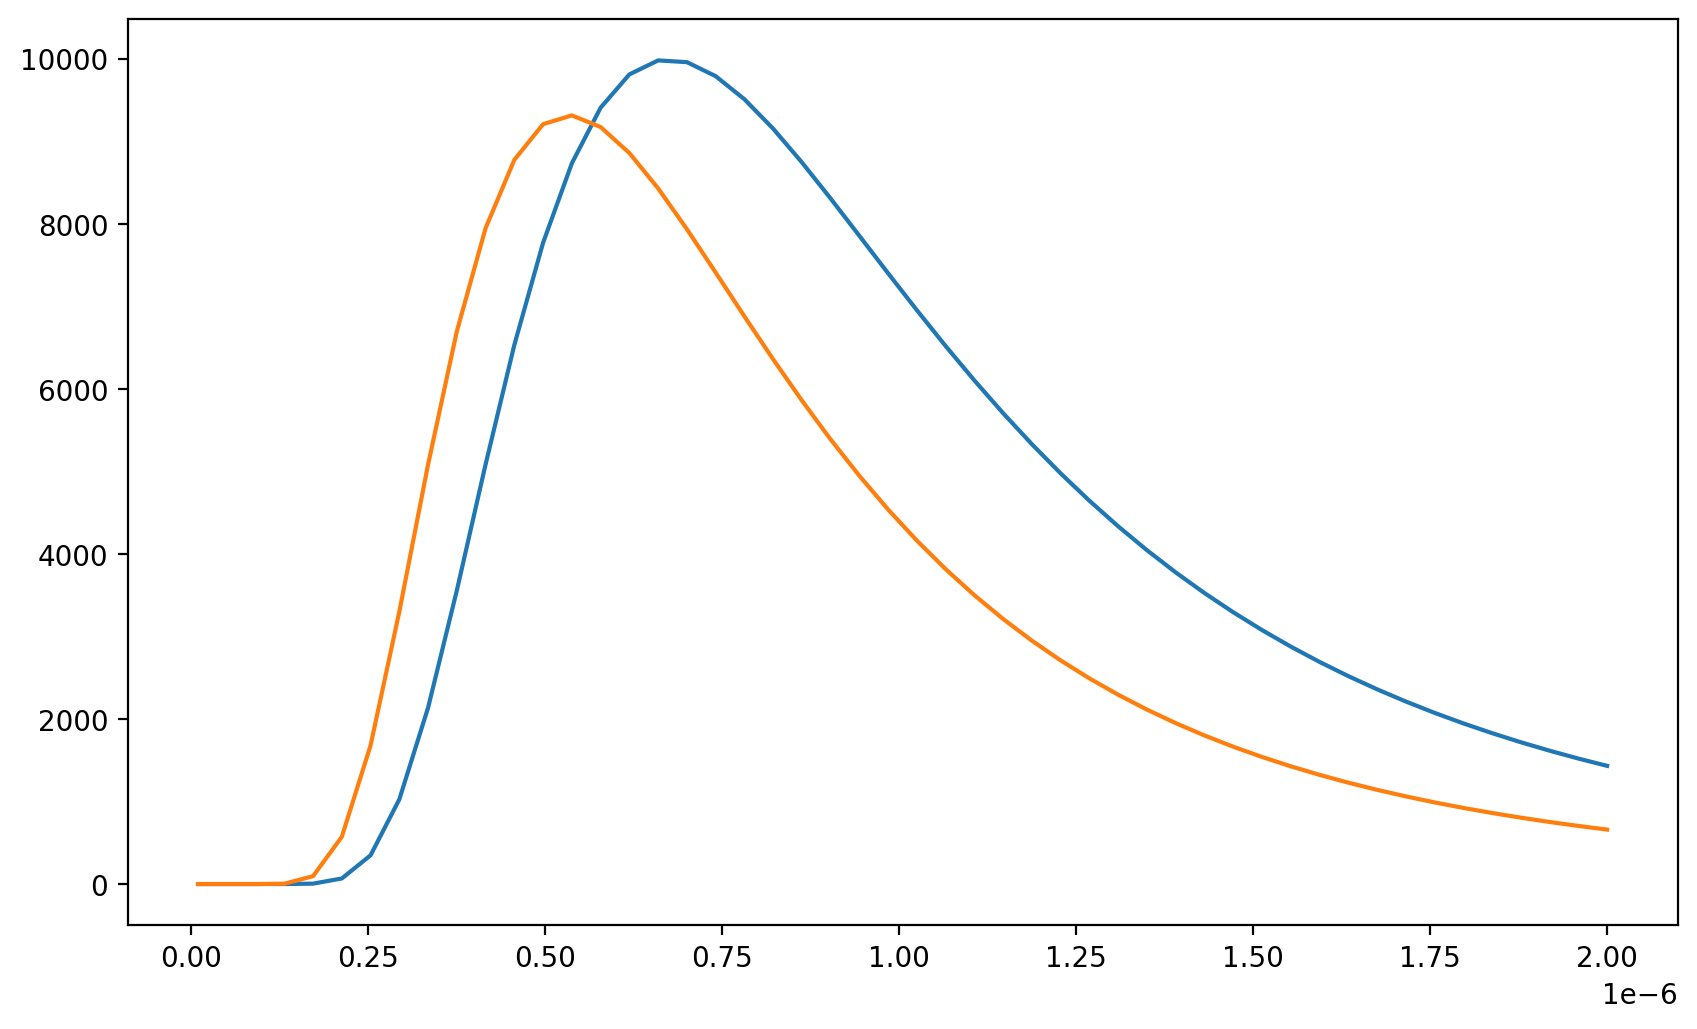

In [60]:
beta = 0.25
x = np.linspace(beta, 1)

plt.figure(figsize=(10,6), dpi=200)
plt.plot(wav, h*c/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1))

bb_fold = [np.trapz( h*c/i**5 * 1/(np.exp(h*c/(k*T*i*(1/np.sqrt(1-beta**2)/(1-beta*x))))-1)*x*(1/np.sqrt(1-beta**2)/(1-beta*x))**-2, 
            x=x ) for i in wav]

plt.plot( wav, bb_fold )

max(bb_fold)/max(bb)

0.8032118833667945

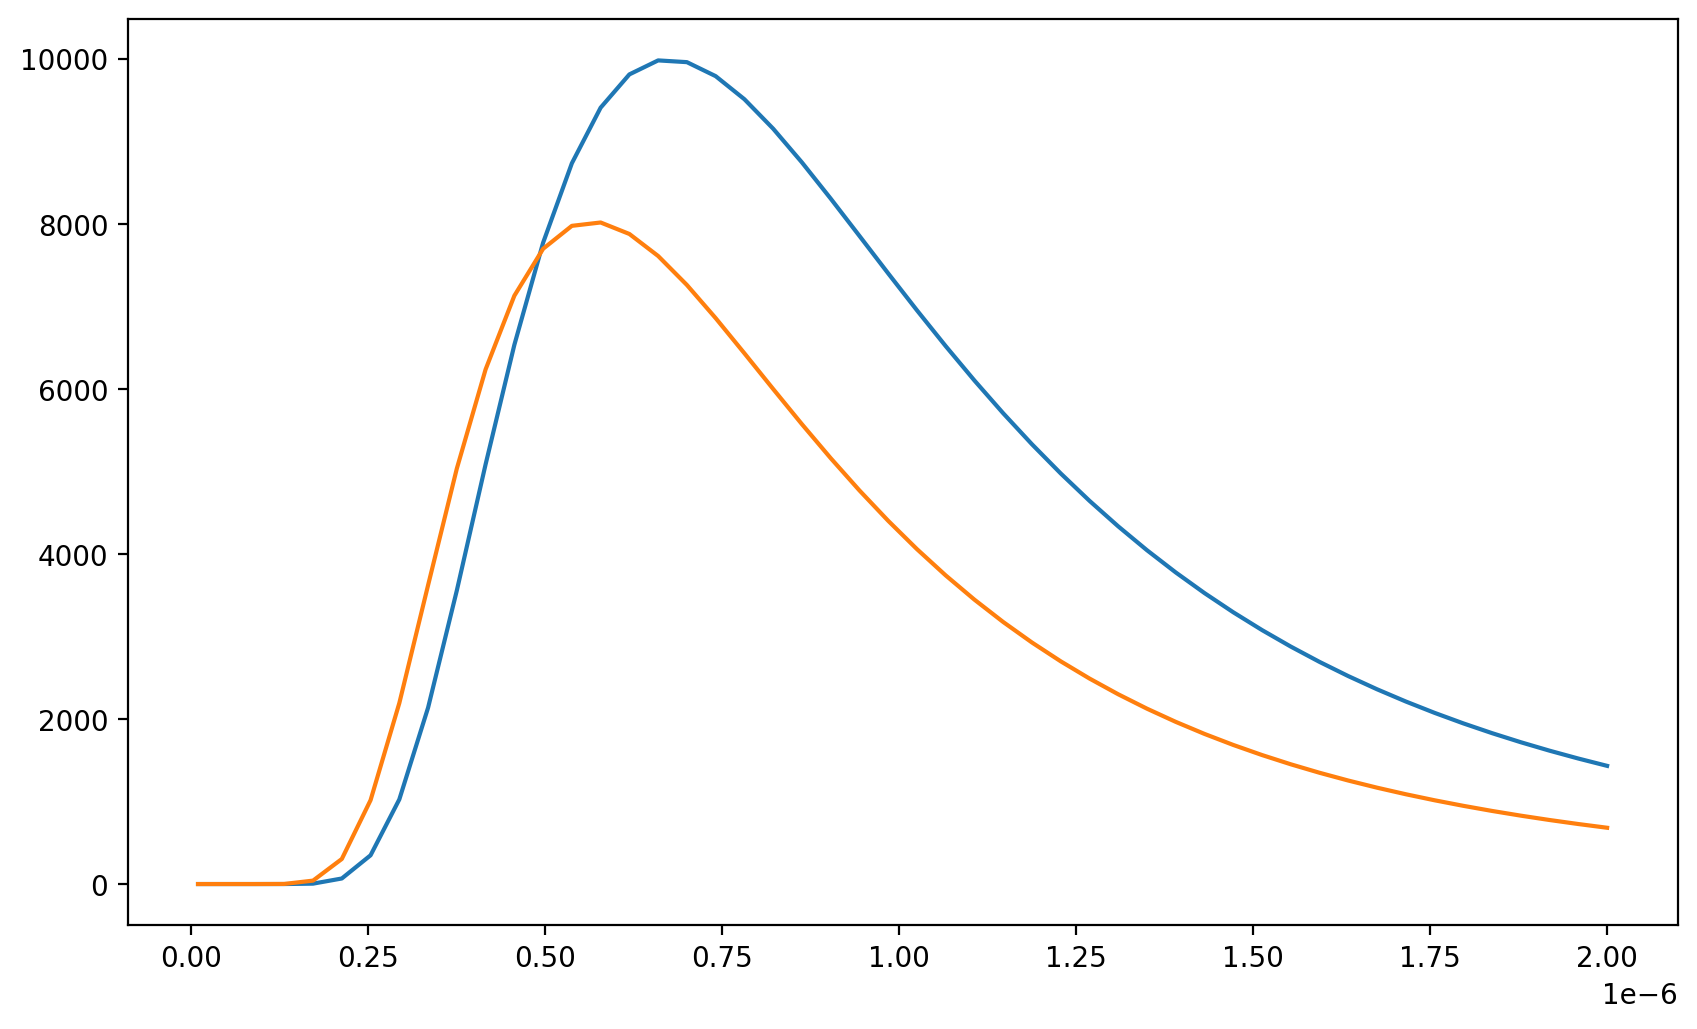

In [61]:
beta = 0.20
x = np.linspace(beta, 1)

plt.figure(figsize=(10,6), dpi=200)
plt.plot(wav, h*c/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1))

bb_fold = [np.trapz( h*c/i**5 * 1/(np.exp(h*c/(k*T*i*(1/np.sqrt(1-beta**2)/(1-beta*x))))-1)*x*(1/np.sqrt(1-beta**2)/(1-beta*x))**-2, 
            x=x ) for i in wav]

plt.plot( wav, bb_fold )

max(bb_fold)/max(bb)

0.9909308874407388

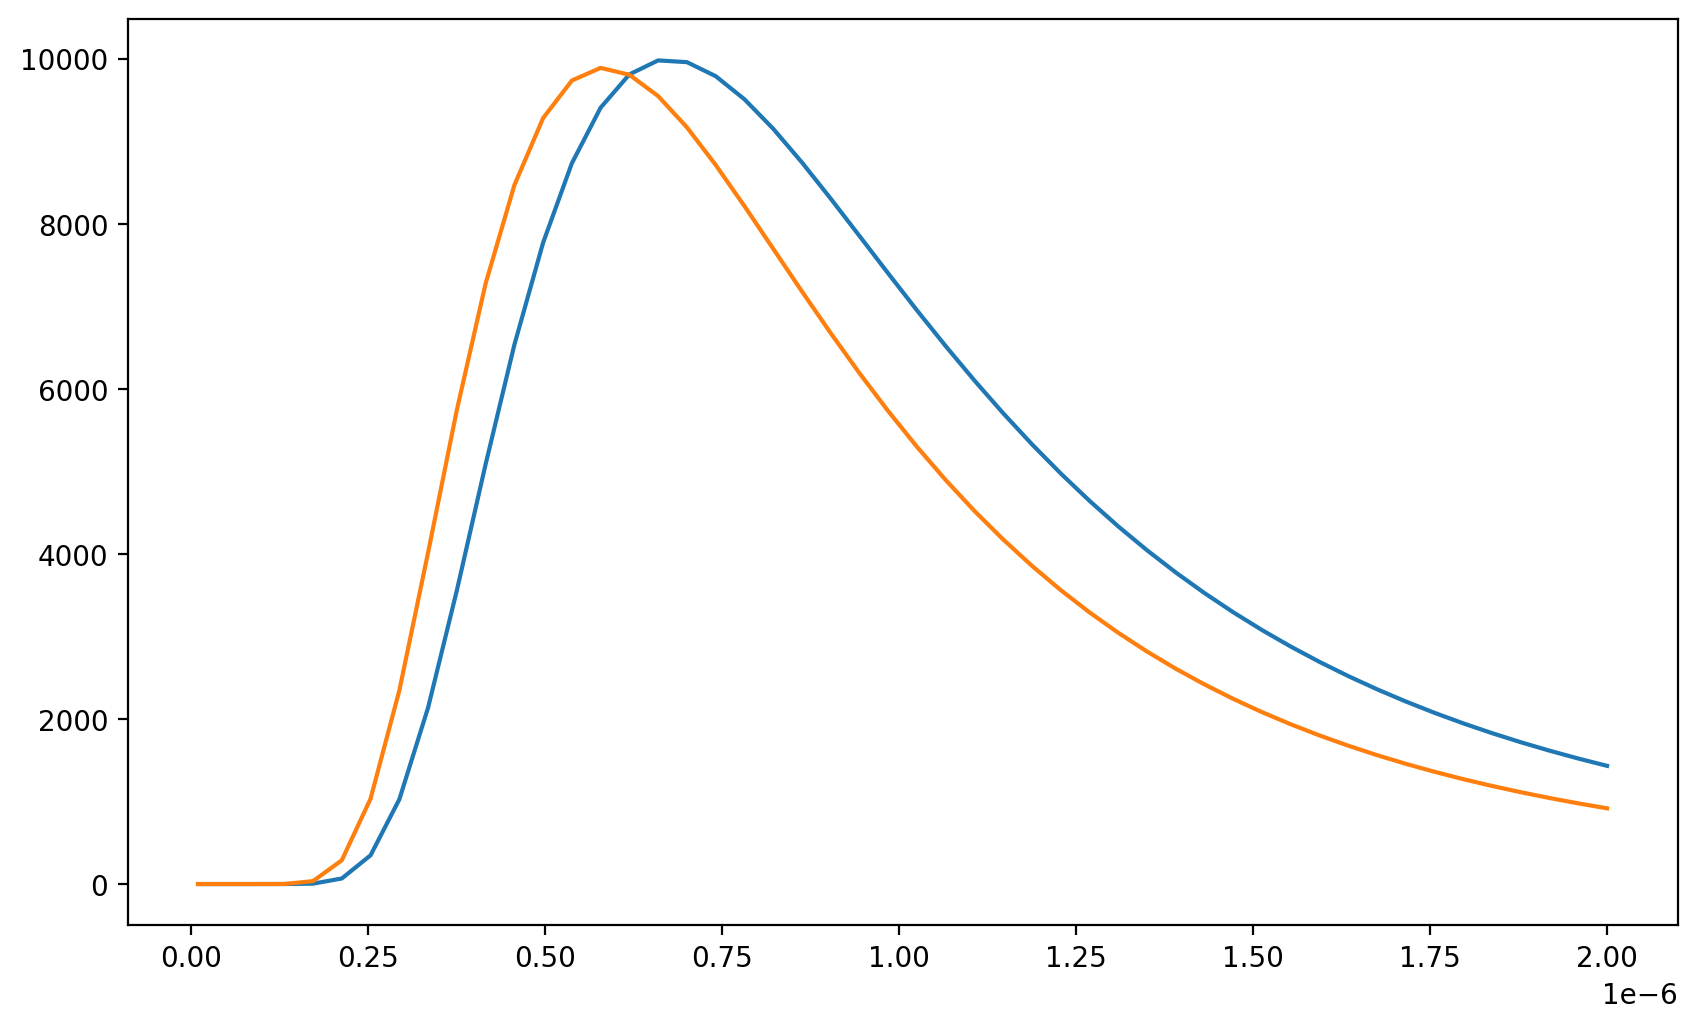

In [111]:
beta = 0.17
x = np.linspace(beta, 1)

plt.figure(figsize=(10,6), dpi=200)
plt.plot(wav, h*c/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1))

bb_fold = [np.trapz( h*c/i**5 * 1/(np.exp(h*c/(k*T*i*(1/np.sqrt(1-beta**2)/(1-beta*x))))-1)*
                    x,#*(1/np.sqrt(1-beta**2)/(1-beta*x))**-2, 
            x=x ) for i in wav]

plt.plot( wav, bb_fold )

max(bb_fold)/max(bb)

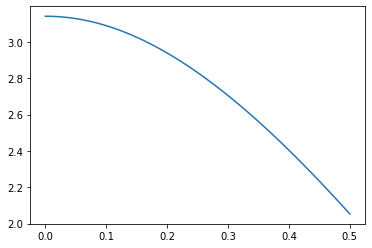

In [9]:
## Using Darachs derivation

ratio = []
beta_list = np.linspace(0.0,0.5)
for beta in beta_list: 
    x = np.linspace(beta, 1)
    bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)
    bb_fold = [np.trapz( (2*np.pi) *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*(1/np.sqrt(1-beta**2)/(1-beta*x))))-1)*
           x, #* (1/np.sqrt(1-beta**2)/(1-beta*x))**(-2), 
                    x=x ) for i in wav]

    p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
    ratio.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
plt.plot(beta_list, np.array(ratio))#*np.sqrt(1-beta_list**2)) #/np.pi)
#plt.plot(beta_list, np.pi*np.sqrt(1-beta_list**2) )

In [10]:
np.savetxt( 'Derivation_conv.txt' , [beta_list, ratio] )

<ipython-input-19-f66ac065cd62>:10: RuntimeWarning: overflow encountered in exp
  bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)
<ipython-input-19-f66ac065cd62>:11: RuntimeWarning: overflow encountered in exp
  bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*(1/np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
<ipython-input-3-05d075f07213>:4: RuntimeWarning: overflow encountered in exp
  return N* a/ ( (wav**5)*(np.exp(b) - 1.0) )
<ipython-input-19-f66ac065cd62>:22: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(beta_list, np.pi*2/beta_list**2*(1-beta_list)*(np.log(1+beta_list)-beta_list/(1+beta_list)) )
<ipython-input-19-f66ac065cd62>:22: RuntimeWarning: invalid value encountered in multiply
  plt.plot(beta_list, np.pi*2/beta_list**2*(1-beta_list)*(np.log(1+beta_list)-beta_list/(1+beta_list)) )


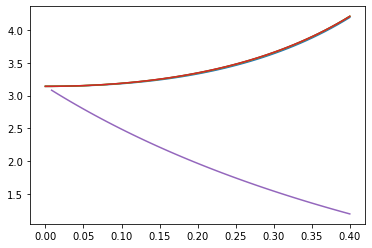

In [19]:
## Using Darachs derivation

ratio = []
beta_list = np.linspace(0.0,0.4)

for T in [2000, 3000, 4000, 10000]: 
    ratio = []
    for beta in beta_list: 
        x = np.linspace(beta, 1)
        bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)
        bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*(1/np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
           (x-beta)/(1-x*beta), #* (1/np.sqrt(1-beta**2)/(1-beta*x))**(-2), 
                    x=x ) for i in wav]

        #p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
        p,cov = curve_fit(temp, wav, bb_fold, p0 = [T, 1])
    
        ratio.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
    plt.plot(beta_list, np.array(ratio)) #/np.pi)
    
plt.plot(beta_list, np.pi*2/beta_list**2*(1-beta_list)*(np.log(1+beta_list)-beta_list/(1+beta_list)) )

In [18]:
np.savetxt( 'Derivation_conv_Sadun_2.txt' , [beta_list, np.pi*2/beta_list**2*(1-beta_list)*(np.log(1+beta_list)-beta_list/(1+beta_list))] )

<ipython-input-18-480ef9484c3d>:1: RuntimeWarning: divide by zero encountered in true_divide
  np.savetxt( 'Derivation_conv_Sadun_2.txt' , [beta_list, np.pi*2/beta_list**2*(1-beta_list)*(np.log(1+beta_list)-beta_list/(1+beta_list))] )
<ipython-input-18-480ef9484c3d>:1: RuntimeWarning: invalid value encountered in multiply
  np.savetxt( 'Derivation_conv_Sadun_2.txt' , [beta_list, np.pi*2/beta_list**2*(1-beta_list)*(np.log(1+beta_list)-beta_list/(1+beta_list))] )


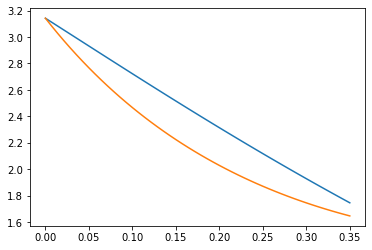

In [55]:
## Using mu' Sadun

ratio = []
beta_list = np.linspace(0.0,0.35)
for beta in beta_list: 
    x = np.linspace(beta, 1)
    bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)
    bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
           (x-beta)/(1-x*beta), #* ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
                    x=x ) for i in wav]

    p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
    ratio.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
plt.plot(beta_list, np.array(ratio)) #/np.pi)
Ratio_Sadun = np.array(ratio)

y = (1-beta_list**2)**(1) * (1+8/3*beta_list+2*beta_list**2-1/3*beta_list**4)
plt.plot(beta_list, np.pi/y)

#plt.plot(beta_list, )

In [51]:
np.savetxt( 'Derivation_conv_Sadun.txt' , [beta_list, np.array(ratio)] )

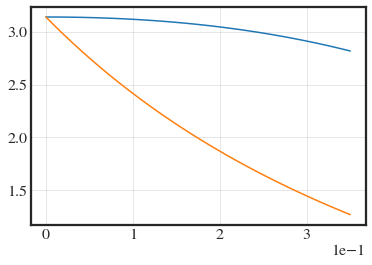

In [92]:
## Using mu' Stuart

ratio = []
beta_list = np.linspace(0.0,0.35)
for beta in beta_list: 
    x = np.linspace(0, 1)
    bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)
    
    bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
           x, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
                    x=x ) for i in wav]
    
    p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
    ratio.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
plt.plot(beta_list, np.array(ratio)) #/np.pi)
ratio_Stuart = np.array(ratio)

y = (1-beta_list**2)**(-1) * (1+8/3*beta_list+2*beta_list**2-1/3*beta_list**4)
plt.plot(beta_list, np.pi/y)

#plt.plot(beta_list, )

In [95]:
(np.sqrt(1-0.3**2)/(1-0.3/np.sqrt(2)))**4

2.149161312589749

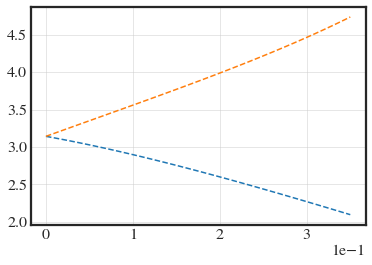

In [400]:
## Using mu' Stuart
T=5000
ratio = []
ratio2 = []
beta_list = np.linspace(0.0,0.35)
T_power = 0.54

for beta in beta_list: 
    x = np.linspace(beta, 1)
    T_power = 0.54
    bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)
    bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T* (1-beta*(1-x))**(-T_power)*
                                                                   i*(np.sqrt(1-beta**2)/(1-beta*x)))) -1)*
           x * ((1-beta)/(1-x*beta))**2,
                    x=x ) for i in wav]
    
    p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
    ratio.append(p[1])  
    
    T_power = 0.0
    x = np.linspace(beta, 1)
    bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*(1-beta*(1-x))**(-T_power)*i*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
           x * ((1-beta)/(1-x*beta))**2, 
           #(x-beta)/(1-x*beta) * ((1-beta)/(1-x*beta))**2, 
                    x=x ) for i in wav]
    
    p2,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
    ratio2.append(p2[1]) 
    
plt.plot(beta_list, np.array(ratio), ls='--')  
plt.plot(beta_list, np.array(ratio2), ls='--') 

In [398]:
np.savetxt( 'Derivation_conv_Stuart.txt' , [beta_list, np.array(ratio)] )
#np.savetxt( 'Derivation_conv_Stuart_with_cooling.txt' , [beta_list, np.array(ratio2)] )

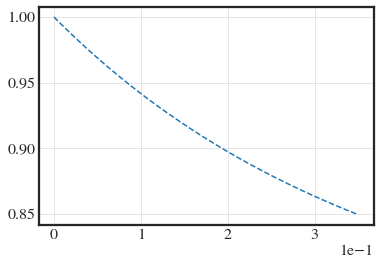

In [394]:
plt.plot(beta_list, np.sqrt(np.array(ratio2)/np.array(ratio)), ls='--') #/np.pi)

In [395]:
np.savetxt( 'Derivation_conv_Sadun_with_geometry.txt' , [beta_list, np.array(ratio2)] )

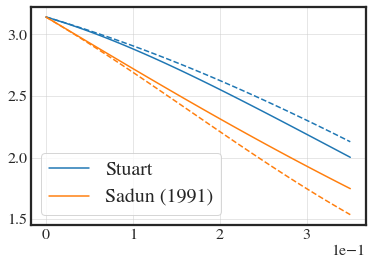

In [211]:
## Using mu' Stuart
T=5000
ratio = []
ratio2 = []
beta_list = np.linspace(0.0,0.35)
for beta in beta_list: 
    x = np.linspace(0, 1)
    bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)
    #bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
    #       x * ((1-beta)/(1-((x-beta)/(1-x*beta))*beta))**2, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
    #                x=x ) for i in wav]

    bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
           x * ((1-beta)/(1-x*beta))**2, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
                    x=x ) for i in wav]
    
    p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
    ratio.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
    bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
           (x-beta)/(1-x*beta), #* ((1-beta)/(1-x*beta))**2, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
                    x=x ) for i in wav]
    
    p2,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
    ratio2.append(p2[1]) # max(bb_fold)/max(bb)) #p[1])#
    
plt.plot(beta_list, np.array(ratio), ls='--') #/np.pi)
plt.plot(beta_list, np.array(ratio2), ls='--') #/np.pi)

ratio = []
ratio2 = []
beta_list = np.linspace(0.0,0.35)
for beta in beta_list: 
    x = np.linspace(beta, 1)
    bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)
    #bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
    #       x * ((1-beta)/(1-((x-beta)/(1-x*beta))*beta))**2, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
    #                x=x ) for i in wav]

    bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
           x * ((1-beta)/(1-x*beta))**2, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
                    x=x ) for i in wav]
    
    p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
    ratio.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
    bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
           (x-beta)/(1-x*beta), #* ((1-beta)/(1-x*beta))**2, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
                    x=x ) for i in wav]
    
    p2,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
    ratio2.append(p2[1]) # max(bb_fold)/max(bb)) #p[1])#
    
plt.plot(beta_list, np.array(ratio), color='C0', label='Stuart') #/np.pi)
plt.plot(beta_list, np.array(ratio2), color='C1', label='Sadun (1991)') #/np.pi)
ratio_Stuart = np.array(ratio)
plt.legend(frameon=True)
#y = (1-beta_list**2)**(-1) * (1+8/3*beta_list+2*beta_list**2-1/3*beta_list**4)
#plt.plot(beta_list, np.pi/y)

#plt.plot(beta_list, )

In [212]:
np.savetxt( 'Derivation_conv_Sadun_2.txt' , [beta_list, np.array(ratio2)] )

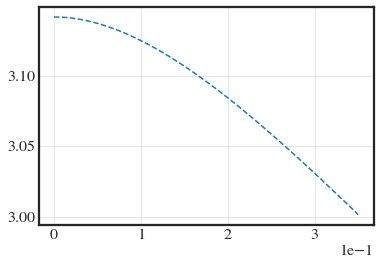

In [204]:
## Using mu to mu' Darach
T=5000
ratio = []
ratio2 = []
beta_list = np.linspace(0.0,0.35)
for beta in beta_list: 
    x = np.linspace(beta, 1)
    bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)

    bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
           (x-beta)/(1-x*beta), #* (np.sqrt(1-beta**2)/(1-beta*x))**2, # * ((1-beta)/(1-x*beta))**2, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
                    x=x ) for i in wav]
    
    p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
    ratio.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
plt.plot(beta_list, np.array(ratio), ls='--') #/np.pi)


In [200]:
np.savetxt( 'Derivation_conv_Sadun.txt' , [beta_list, np.array(ratio)] )

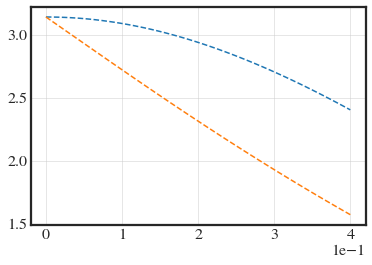

In [324]:
## Using mu Stuart with cooling in time
T=5000
ratio = []
ratio2 = []
beta_list = np.linspace(0.0,0.40)

for T_power in [0.0]: 
    for beta in beta_list: 
        x = np.linspace(beta, 1)
        bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)

        bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*(1-beta*(-x))**(T_power)*i*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
               (x), #* ((1-beta)/(1-x*beta))**2, #* (np.sqrt(1-beta**2)/(1-beta*x))**2, # * ((1-beta)/(1-x*beta))**2, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
                        x=x ) for i in wav]
    
        p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
        ratio.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
    plt.plot(beta_list, np.array(ratio), ls='--') #/np.pi)

for T_power in [0.0]: #-0.5, -1, -2]: 
    ratio2 = []
    for beta in beta_list: 
        x = np.linspace(beta, 1)
        bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)

        bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*(1-beta*(-x))**(T_power)*i*(np.sqrt(1-beta**2)/(1-beta*x))))-1)*
               (x-beta)/(1-x*beta), #* ((1-beta)/(1-x*beta))**2, # * ((1-beta)/(1-x*beta))**2, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
                        x=x ) for i in wav]
    
        p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
        ratio2.append(p[1]) 
    
    plt.plot(beta_list, np.array(ratio2), ls='--') #/np.pi)


In [297]:
np.savetxt( 'Derivation_conv_Stuart_with_Cooling.txt' , [beta_list, np.array(ratio2)] )

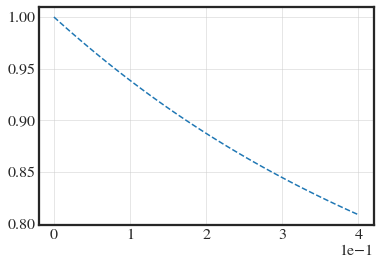

In [325]:
plt.plot(beta_list, np.sqrt(np.array(ratio2)/np.array(ratio)), ls='--') 

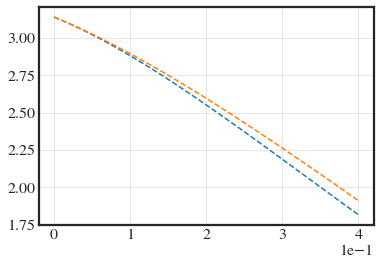

In [342]:
## Using mu Stuart with cooling in time
T=5000
ratio = []
ratio2 = []
beta_list = np.linspace(0.0,0.40)

for T_power in [0.0]: 
    for beta in beta_list: 
        x = np.linspace(beta, 1)
        bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)

        bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*(1-beta*(1-x))**(T_power)*i*(np.sqrt(1-beta**2)/(1-beta*x))))-1)*
               (x) * ((1-beta)/(1-x*beta))**2, # * ((1-beta)/(1-x*beta))**2, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
                        x=x ) for i in wav]
    
        p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
        ratio.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
    plt.plot(beta_list, np.array(ratio), ls='--') #/np.pi)

for T_power in [-0.5]: 
    ratio2 = []
    for beta in beta_list: 
        x = np.linspace(beta, 1)
        bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)

        bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*(1-beta*(1-x))**(T_power)*i*(np.sqrt(1-beta**2)/(1-beta*x))))-1)*
               (x) * ((1-beta)/(1-x*beta))**2, # * ((1-beta)/(1-x*beta))**2, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
                        x=x ) for i in wav]
    
        p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
        ratio2.append(p[1]) 
    
    plt.plot(beta_list, np.array(ratio2), ls='--') #/np.pi)


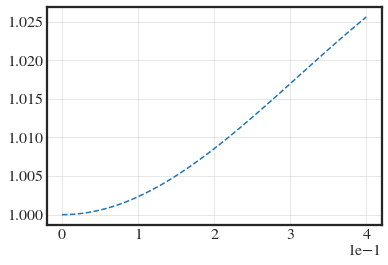

In [343]:
plt.plot(beta_list, np.sqrt(np.array(ratio2)/np.array(ratio)), ls='--') 

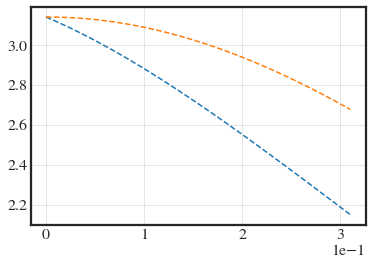

In [270]:
## Using mu Stuart with cooling in time
T=5000
ratio = []
ratio2 = []
beta_list = np.linspace(0.0,0.31)

for T_power in [0.0]: 
    for beta in beta_list: 
        x = np.linspace(beta, 1)
        bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)

        bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*(1-beta*(1-x))**(-T_power)*i*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
               (x) * ((1-beta)/(1-x*beta))**2, #* (np.sqrt(1-beta**2)/(1-beta*x))**2, # * ((1-beta)/(1-x*beta))**2, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
                        x=x ) for i in wav]
    
        p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
        ratio.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
    plt.plot(beta_list, np.array(ratio), ls='--') #/np.pi)

for T_power in [0.0]: 
    for beta in beta_list: 
        x = np.linspace(beta, 1)
        bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)

        bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*(1-beta*(1-x))**(-T_power)*i*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
               (x), #* ((1-beta)/(1-x*beta))**2, #* (np.sqrt(1-beta**2)/(1-beta*x))**2, # * ((1-beta)/(1-x*beta))**2, # * ((1-beta**2)**(1/2)/(1-beta*x))**(2), 
                        x=x ) for i in wav]
    
        p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
        ratio2.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
    plt.plot(beta_list, np.array(ratio2), ls='--') #/np.pi)


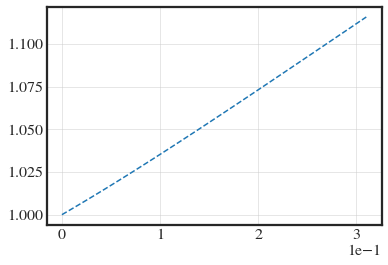

In [271]:
plt.plot(beta_list, np.sqrt(np.array(ratio2)/np.array(ratio)), ls='--') 

In [233]:
np.savetxt( 'Derivation_conv_Stuart_with_cooling.txt' , [beta_list, np.array(ratio)] )

<ipython-input-168-d1afabbb3ec8>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(beta1, np.pi/doppler1**2, ls='--', label=r'$\delta^2$ [Aberration]')


(0.0, 3.141592653589793)

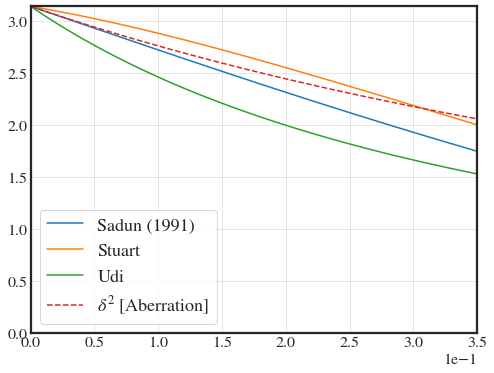

In [168]:
reset_plt(16,20)
plt.figure(figsize=(8,6))
plt.plot(beta_list, Ratio_Sadun, label='Sadun (1991)')
plt.plot(beta_list, ratio_Stuart,label='Stuart')
plt.plot(beta_list, np.pi/y2, label='Udi')

beta1, doppler1 = np.loadtxt('../doppler_with_cossin.txt')
plt.plot(beta1, np.pi/doppler1**2, ls='--', label=r'$\delta^2$ [Aberration]')
#plt.plot(beta_list, np.pi/np.array(C), label='Udi ()' )

plt.legend(fontsize=18, frameon=True)
plt.xlim(0, 0.35)
plt.ylim(0, np.pi)
#plt.savefig('../Pictures/Doppler_derivation.png', dpi=300)

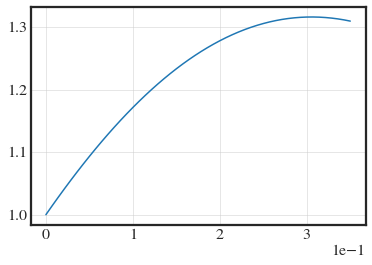

In [121]:
plt.plot(beta_list, ratio_Stuart/(np.pi/y2),label='Stuart')


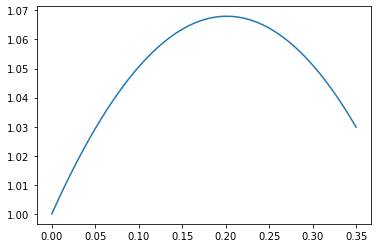

In [70]:
plt.plot(beta_list, np.sqrt(np.array(ratio)/(np.pi/y)))

In [26]:
#np.savetxt( 'Derivation_conv_Udi.txt' , [beta_list, np.pi/y] )

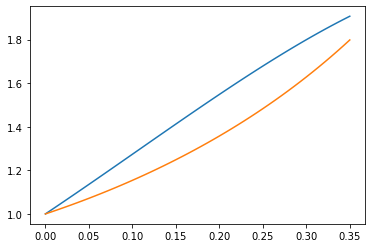

In [27]:
plt.plot(beta_list, y)
plt.plot(beta_list, np.pi/np.array(ratio)) #/np.pi)


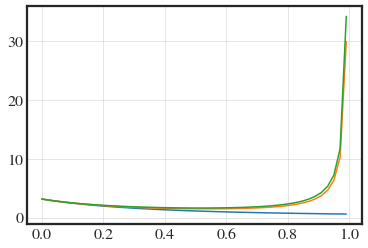

In [152]:
## Using mu' from Udi

ratio = []
beta_list = np.linspace(0.0,0.99)
for beta in beta_list: 
    x = np.linspace(-beta, 1)
    bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)
    bb_fold = [np.trapz( 2*np.pi *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i))-1)*#*(np.sqrt(1-beta**2)/(1-beta*x)) ))-1)*
           ((x+beta)*(1+x*beta)), #* (np.sqrt(1-beta**2)/(1-beta*x))**(-2), 
                    x=x ) for i in wav]

    p,cov = curve_fit(temp, wav, bb_fold, p0 = [4000, 1])
    
    ratio.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
plt.plot(beta_list, np.pi**2/np.array(ratio)) #/np.pi)

y = (1-beta_list**2)**(1) * (1+8/3*beta_list+2*beta_list**2-1/3*beta_list**4)
plt.plot(beta_list, np.pi/y)

y2 = (1-beta_list**2)**(1) * (1+8/3*beta_list+beta_list**2)
plt.plot(beta_list, np.pi/y2)

(1.0, 2.83)

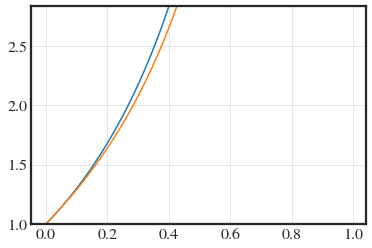

In [156]:
y = (1-beta_list**2)**(-1) * (1+8/3*beta_list+2*beta_list**2-1/3*beta_list**4)
plt.plot(beta_list, y)

y2 = (1-beta_list**2)**(-1) * (1+8/3*beta_list+beta_list**2)
plt.plot(beta_list, y2)

plt.ylim(1, 2.83)

1.1428326940975302

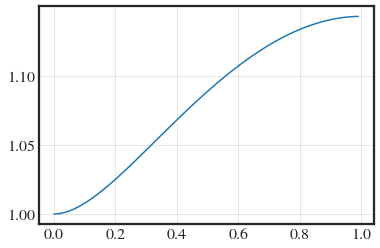

In [151]:
plt.plot(beta_list, y/y2)
max(y/y2)

In [135]:
np.savetxt( 'Derivation_conv_Udi.txt' , [beta_list, np.pi/y] )
np.savetxt( 'Derivation_conv_Udi_Y2.txt' , [beta_list, np.pi/y2] )

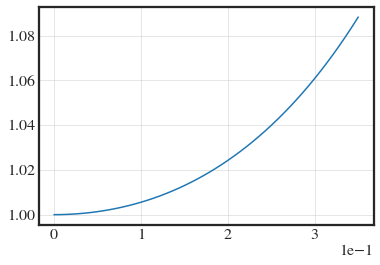

In [159]:
## Using r(t) Udi
C = []
beta_list = np.linspace(0.0,0.35)
for beta in beta_list: 
    x = np.linspace(0, 1)
    C0 = 2*(1-beta)**4*np.trapz(x*(1-beta*x)**(-6), x=x)
    
    C.append(C0)
plt.plot(beta_list, C)
C = np.array(C)

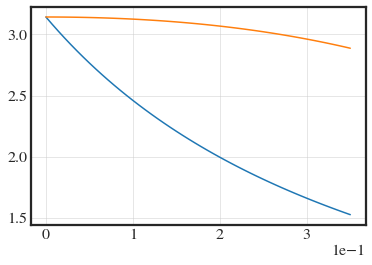

In [160]:
y = (1-beta_list**2)**(1) * (1+8/3*beta_list+2*beta_list**2-1/3*beta_list**4)
y2 = (1+8/3*beta_list+beta_list**2)
plt.plot(beta_list, np.pi/y2)
plt.plot(beta_list, np.pi/C)
np.savetxt( 'Derivation_conv_Udi_full.txt' , [beta_list, np.pi/C] )

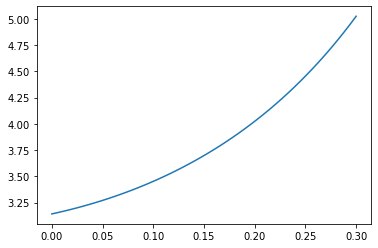

In [295]:
## Using 

ratio = []
beta_list = np.linspace(0.0,0.3)
for beta in beta_list: 
    x = np.linspace(beta, 1)
    bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)
    bb_fold = [np.trapz( (2*np.pi) *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i*np.sqrt(1-beta**2)*(1-beta*x)))-1)*
           (x-beta)/(1-x*beta) * (1/np.sqrt(1-beta**2)/(1-beta*x))**(3), 
                    x=x ) for i in wav]

    p,cov = curve_fit(temp, wav, bb_fold, p0 = [5000, 1])
    
    ratio.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
plt.plot(beta_list, np.array(ratio)) #/np.pi)

In [293]:
np.savetxt( 'Derivation_conv_1.txt' , [beta_list, ratio] )

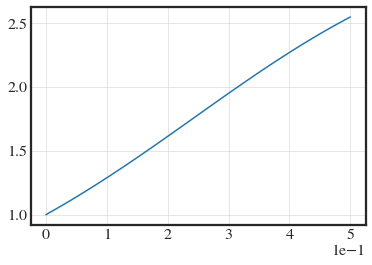

In [131]:
## Using 

ratio = []
beta_list = np.linspace(0.0,0.5)
for beta in beta_list: 
    x = np.linspace(-beta, 1)
    bb = 2*h*c**2/wav**5 * 1/(np.exp(h*c/(k*T*wav))-1)
    bb_fold = [np.trapz( (2) *  2*h*c**2/i**5 * 1/(np.exp(h*c/(k*T*i * np.sqrt(1-beta**2)/(1-beta*x)))-1)*
           (x+beta)*(1+x*beta)* (1-beta**2)**(-1), 
                    x=x ) for i in wav]

    p,cov = curve_fit(temp, wav, bb_fold, p0 = [5000, 1])
    
    ratio.append(p[1]) # max(bb_fold)/max(bb)) #p[1])#
    
plt.plot(beta_list, np.array(ratio)) #/np.pi)